# Network definition and training

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from luxonis_ml.data import LuxonisDataset, LuxonisLoader
from luxonis_ml.enums import LabelType

dataset_name = "coco_test"

## Dataset creation

To create the example `COCO_people` dataset, follow the instructions in [luxonis-ml](https://github.com/luxonis/luxonis-ml/blob/dev/examples/COCO_people_subset.ipynb).

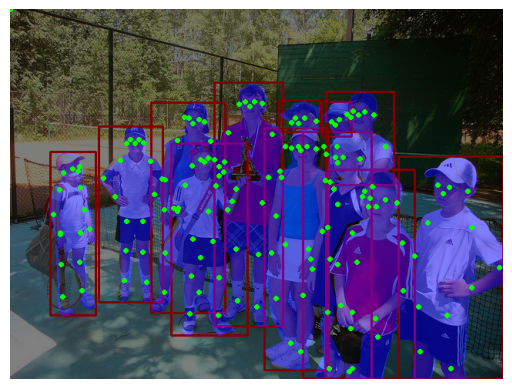

In [2]:
dataset = LuxonisDataset(
    dataset_name=dataset_name
)

loader = LuxonisLoader(dataset, view="train")
for image, ann in loader:
    cls = ann[LabelType.CLASSIFICATION]
    box = ann[LabelType.BOUNDINGBOX]
    seg = ann[LabelType.SEGMENTATION]
    kps = ann[LabelType.KEYPOINT]

    h, w, _ = image.shape
    for b in box:
        cv2.rectangle(image, (int(b[1]*w),int(b[2]*h)), (int(b[1]*w+b[3]*w),int(b[2]*h+b[4]*h)), (255,0,0), 2)
    mask_viz = np.zeros((h,w,3)).astype(np.uint8)
    for mask in seg:
        mask_viz[mask==1, 2] = 255
    image = cv2.addWeighted(image, 0.5, mask_viz, 0.5, 0)

    for kp in kps:
        kp = kp[1:].reshape(-1,3)
        for k in kp:
            cv2.circle(image, (int(k[0]*w),int(k[1]*h)), 2, (0,255,0), 2)

    plt.imshow(image)
    plt.axis('off')  # Optional: Hide axis
    plt.show()
    break

## Training

To start the training, we first need a configuration file. In this notebook, 
we will use an example [coco_test.yaml](../configs/coco_test.yaml).

To run the training, simply run `python -m luxonis_train train --config ../configs/coco_test.yaml`.


In [3]:
%load_ext tensorboard
%tensorboard --logdir ../output/tensorboard_logs

In [5]:
!python -m luxonis_train train --config ../configs/coco_test.yaml

'python -m luxonis_train train --config ../configs/coco_test.yaml'